## Data Conditioning

In order to use the modeling tools available to us, we need to condition the data, and to normalize each of its features. In this section we will attempt to normalize the data by applying log transformation to reduce skewness, followed by standard scaling - which makes the values of each feature in the data have zero-mean and unit-variance.

In [1]:
library(MASS)

In [2]:
data(Boston)

In [3]:
dim(Boston)

[1] 506  14

In [4]:
Boston$medv <- NULL

In [5]:
install.packages('moments')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
library(moments)

In [7]:
stats = data.frame(feature=colnames(Boston))
stats['mean_'] = sapply(Boston, mean)
stats['sd_'] = sapply(Boston, sd)
stats['skewness_'] = sapply(Boston, skewness)
stats['kurtosis_'] = sapply(Boston, kurtosis)
stats

feature,mean_,sd_,skewness_,kurtosis_
crim,3.61352356,8.6015451,5.2076524,39.752786
zn,11.36363636,23.3224530,2.2190631,6.979949
indus,11.13677866,6.8603529,0.2941463,1.766782
chas,0.06916996,0.2539940,3.3957993,12.531453
nox,0.55469506,0.1158777,0.7271442,2.924136
rm,6.28463439,0.7026171,0.4024147,4.861027
age,68.57490119,28.1488614,-0.5971856,2.029986
dis,3.79504269,2.1057101,1.0087788,3.471299
rad,9.54940711,8.7072594,1.0018335,2.129479
tax,408.23715415,168.5371161,0.6679683,1.857015


In [8]:
Boston_scaled <- data.frame(scale(Boston))

In [9]:
stats_scaled = data.frame(feature=colnames(Boston_scaled))
stats_scaled['mean_'] = sapply(Boston_scaled, mean)
stats_scaled['sd_'] = sapply(Boston_scaled, sd)
stats_scaled['skewness_'] = sapply(Boston_scaled, skewness)
stats_scaled['kurtosis_'] = sapply(Boston_scaled, kurtosis)
stats_scaled

feature,mean_,sd_,skewness_,kurtosis_
crim,-7.202981e-18,1,5.2076524,39.752786
zn,2.282481e-17,1,2.2190631,6.979949
indus,1.595296e-17,1,0.2941463,1.766782
chas,-3.544441e-18,1,3.3957993,12.531453
nox,-2.150022e-16,1,0.7271442,2.924136
rm,-1.056462e-16,1,0.4024147,4.861027
age,-1.643357e-16,1,-0.5971856,2.029986
dis,1.153079e-16,1,1.0087788,3.471299
rad,4.799652e-17,1,1.0018335,2.129479
tax,2.024415e-17,1,0.6679683,1.857015


In [10]:
library(ggplot2)
library(repr)
options(repr.plot.width=10, repr.plot.height=2)

In [11]:
source('multiplot.r')

In [12]:
original_v_scaled <- function (feature) {
    original_feature <- as.vector(Boston[[feature]])
    scaled_feature <- as.vector(Boston_scaled[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))
    p2 <- qplot(scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Scaled Distribution of", feature))  
    multiplot(p1, p2, cols=2)
}

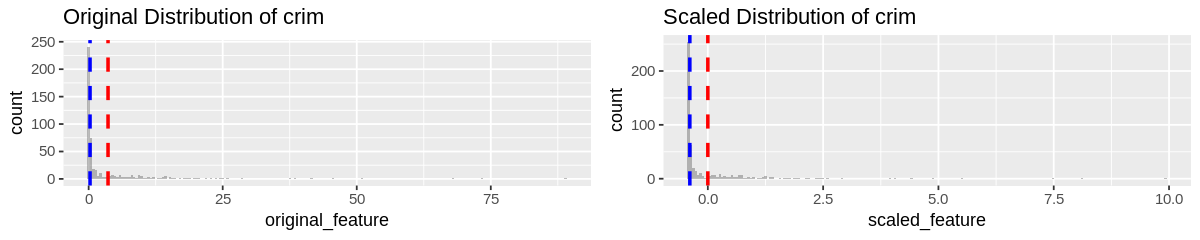

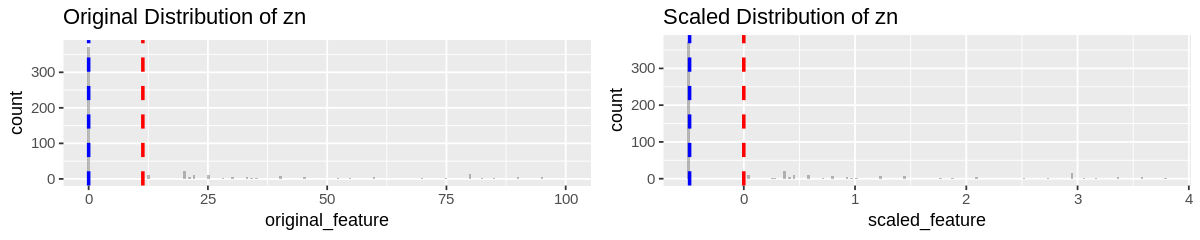

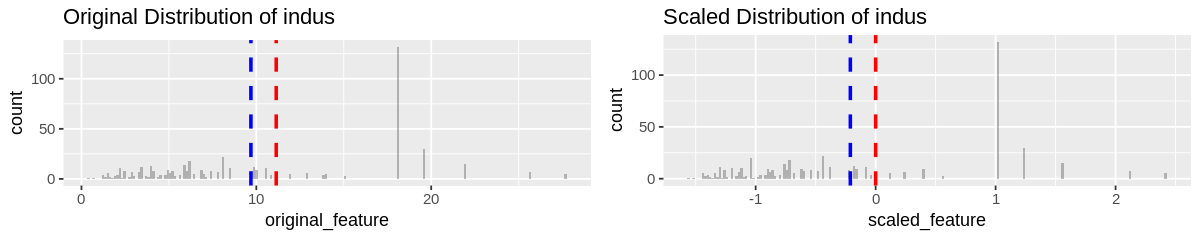

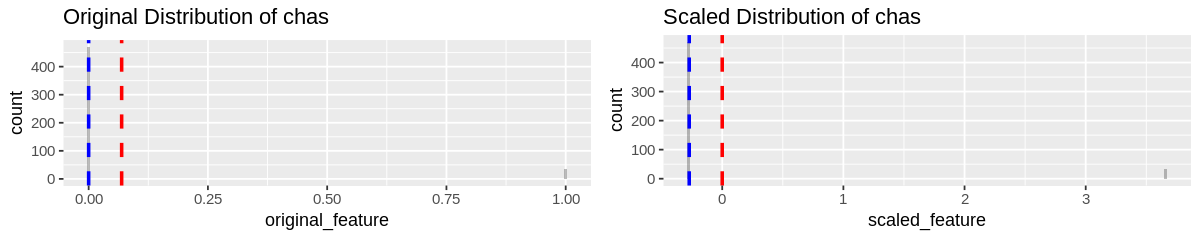

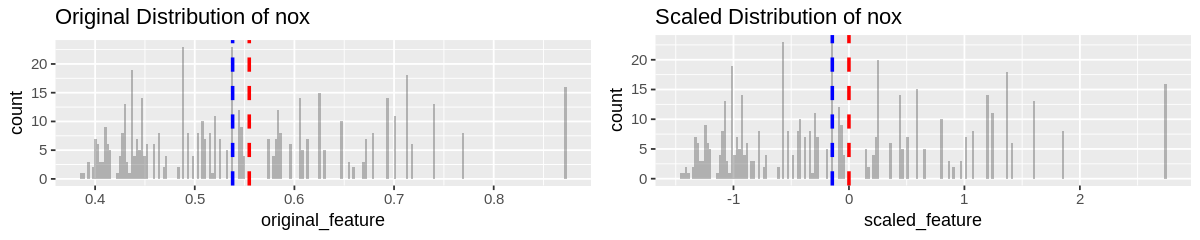

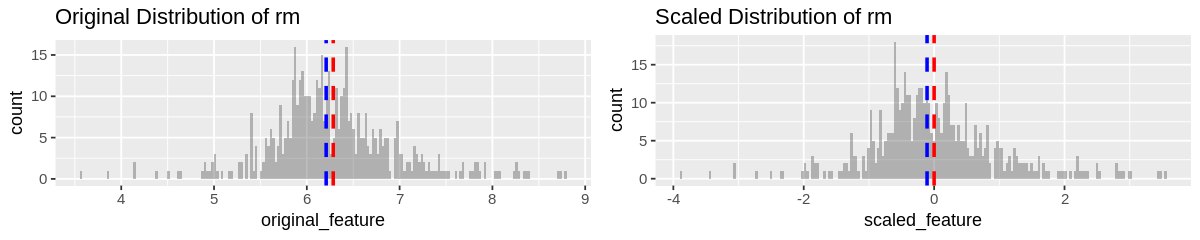

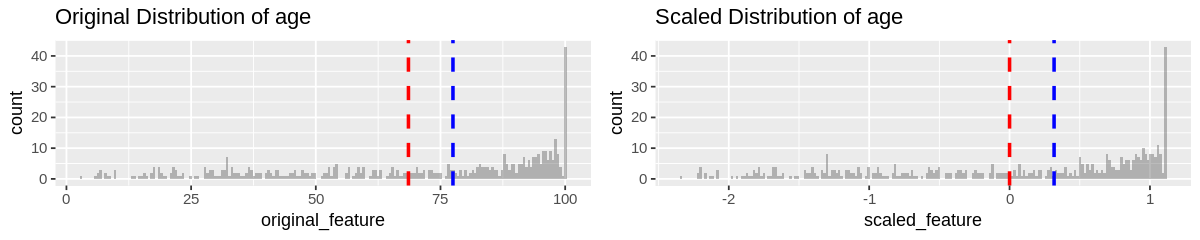

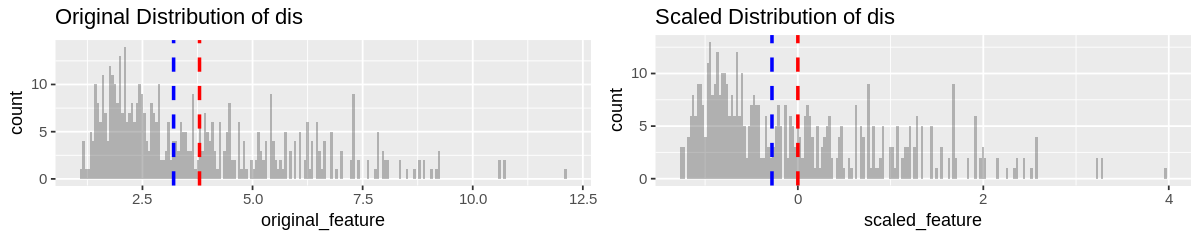

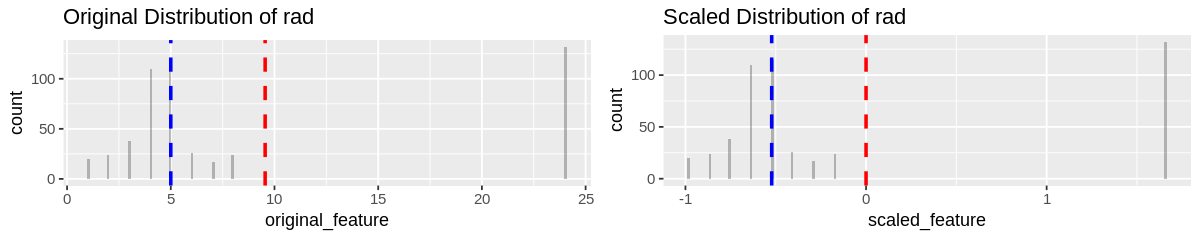

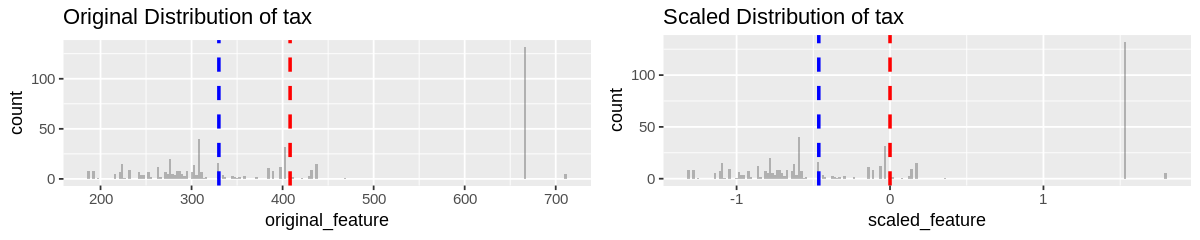

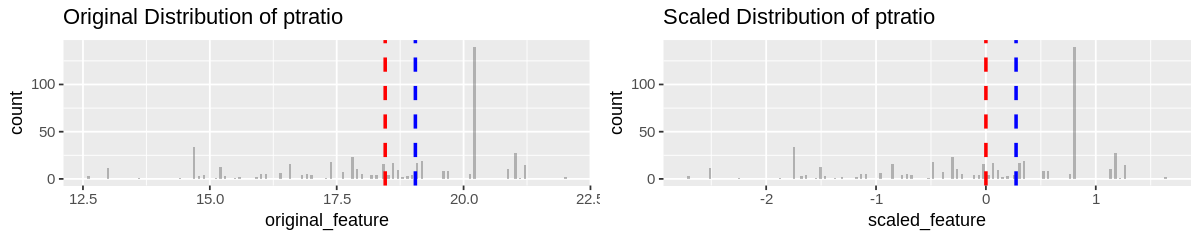

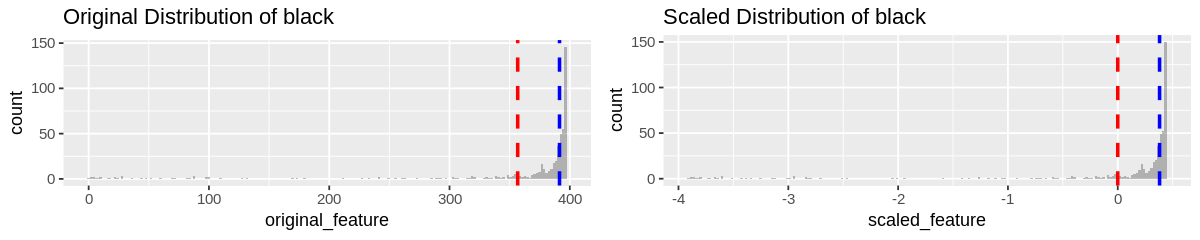

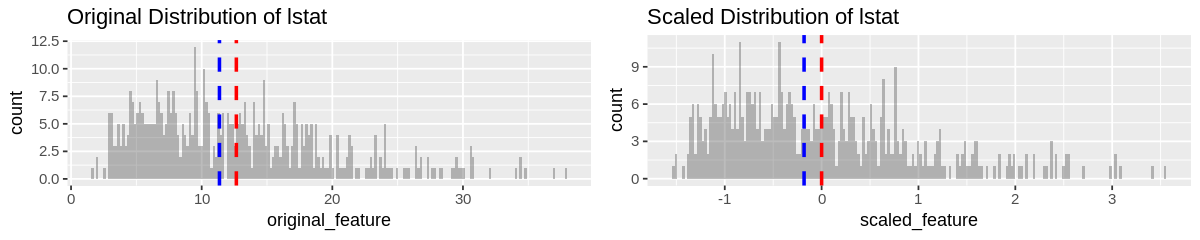

In [13]:
for (i in 1:length(Boston))
    original_v_scaled(colnames(Boston[i]))

In [14]:
Boston$zn <- Boston$zn + 1
Boston$chas <- Boston$chas + .5
Boston_log <- log(Boston)

In [15]:
Boston_log_scaled <- data.frame(scale(Boston_log))

In [16]:
skewness_ = data.frame(feature=colnames(Boston))
skewness_['skew_'] = sapply(Boston, skewness)
skewness_['skew_sc'] = sapply(Boston_scaled, skewness)

In [17]:
skewness_['skew_log_'] <- sapply(Boston_log, skewness)
skewness_['skew_log_scaled'] <- sapply(Boston_log_scaled, skewness)

In [18]:
skewness_

feature,skew_,skew_sc,skew_log_,skew_log_scaled
crim,5.2076524,5.2076524,0.4047301,0.4047301
zn,2.2190631,2.2190631,1.1899106,1.1899106
indus,0.2941463,0.2941463,-0.6412176,-0.6412176
chas,3.3957993,3.3957993,3.3957993,3.3957993
nox,0.7271442,0.7271442,0.3567181,0.3567181
rm,0.4024147,0.4024147,-0.2937892,-0.2937892
age,-0.5971856,-0.5971856,-1.6706836,-1.6706836
dis,1.0087788,1.0087788,0.1522770,0.1522770
rad,1.0018335,1.0018335,0.2857667,0.2857667
tax,0.6679683,0.6679683,0.3295759,0.3295759


In [19]:
original_v_scaled_v_log <- function (feature) {
    original_feature <- as.vector(Boston[[feature]])
    scaled_feature <- as.vector(Boston_scaled[[feature]])
    log_feature <- as.vector(Boston_log[[feature]])
    log_scaled_feature <- as.vector(Boston_log_scaled[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))
    p2 <- qplot(scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Scaled Distribution of", feature))  
    p3 <- qplot(log_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(log_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(log_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Log Distribution of", feature))
    p4 <- qplot(log_scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(log_scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(log_scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Log Scaled Distribution of", feature))  
    multiplot(p1, p2, p3, p4, cols=4)
}

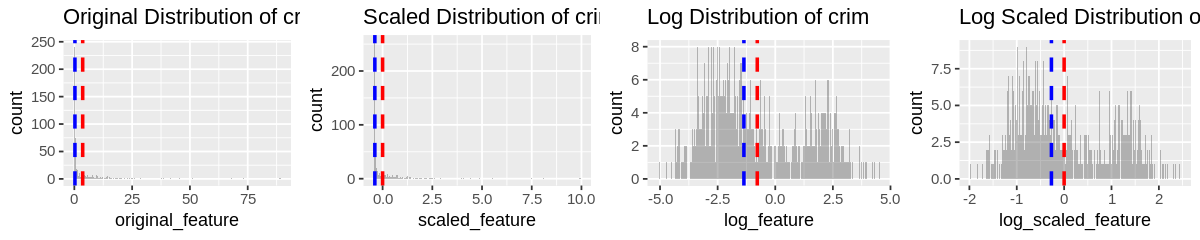

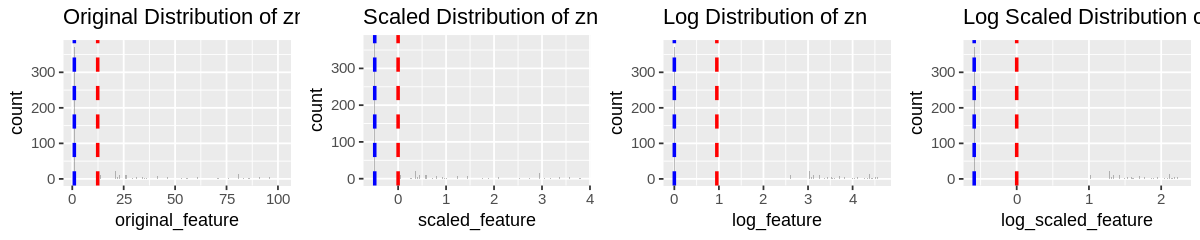

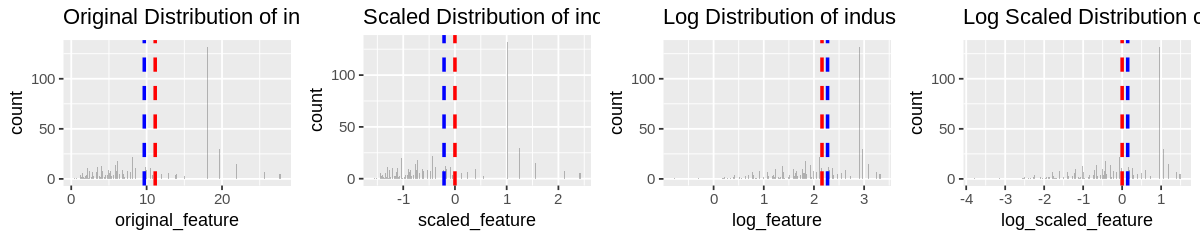

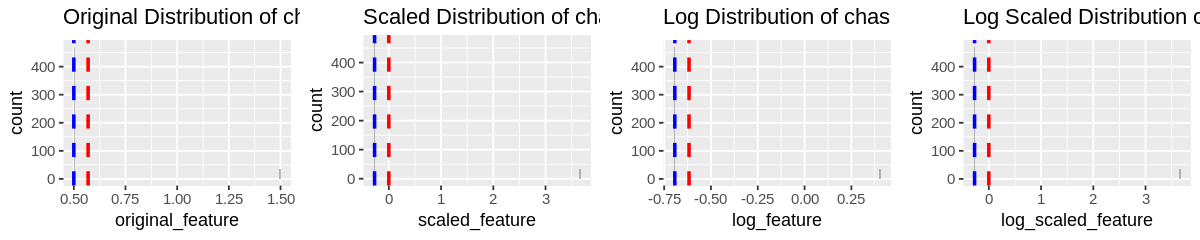

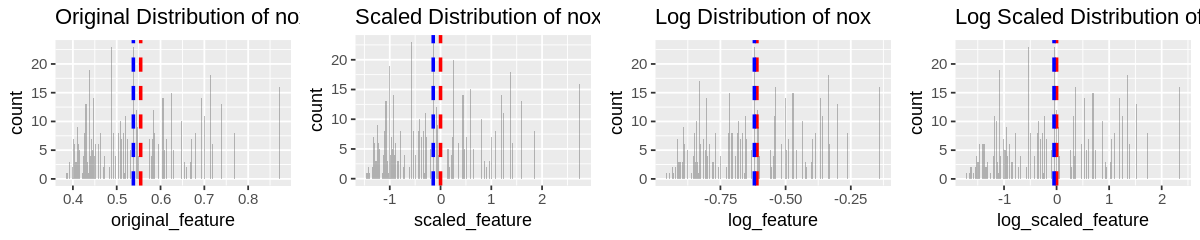

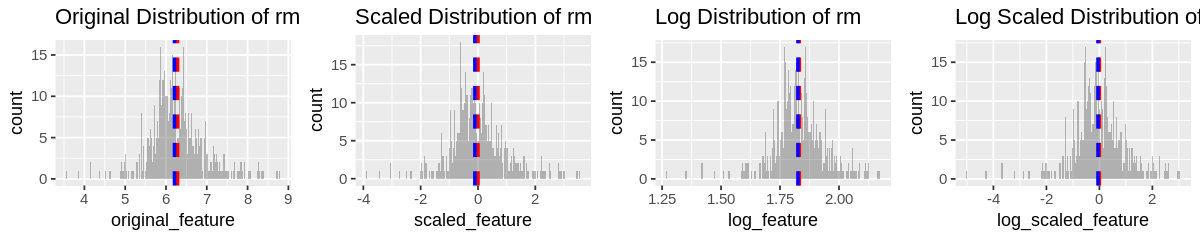

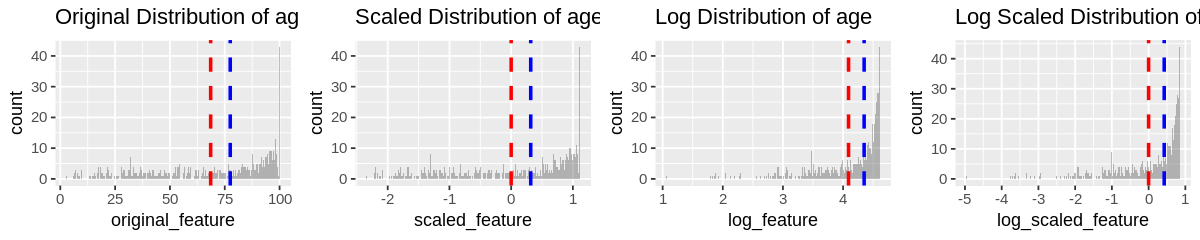

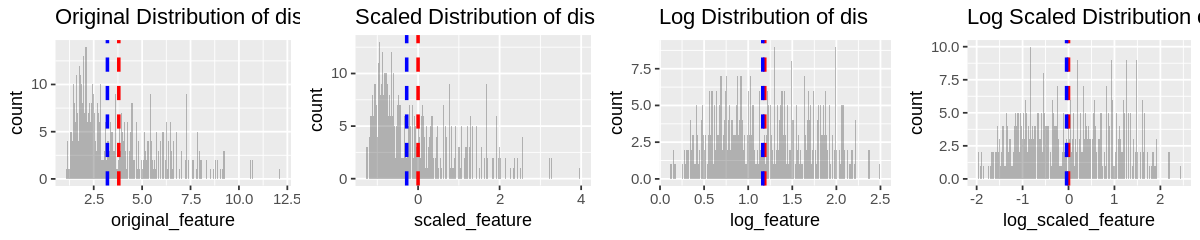

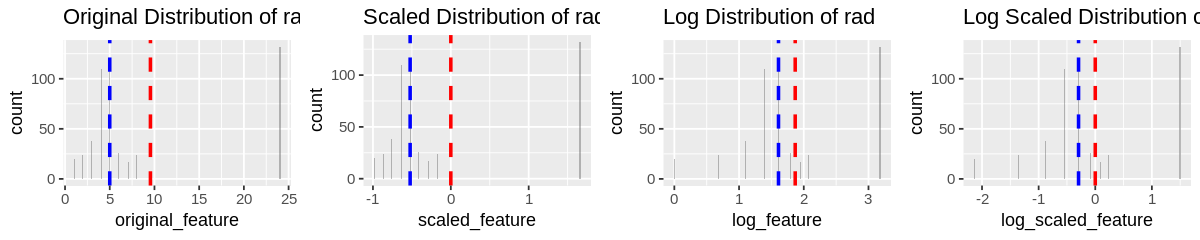

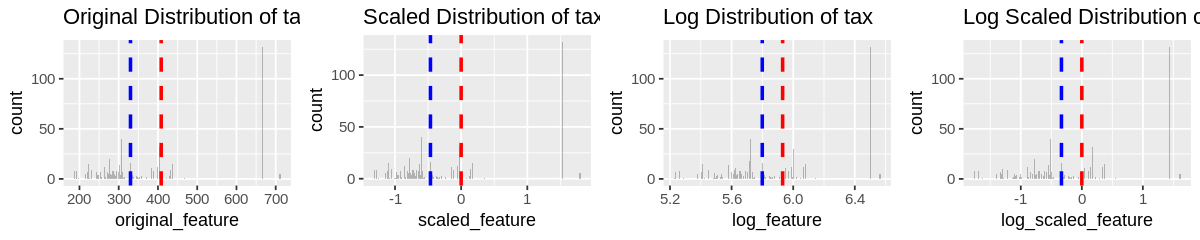

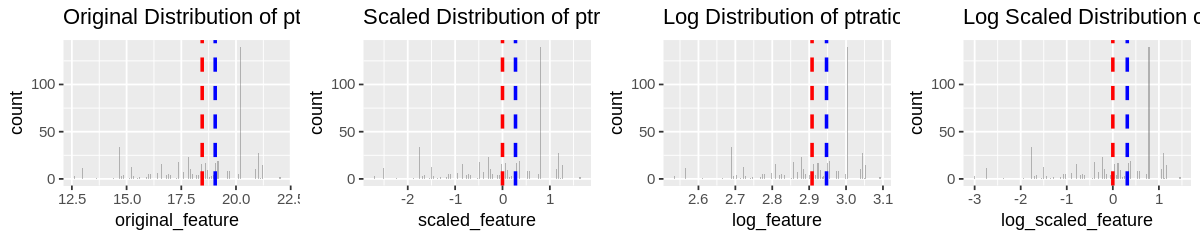

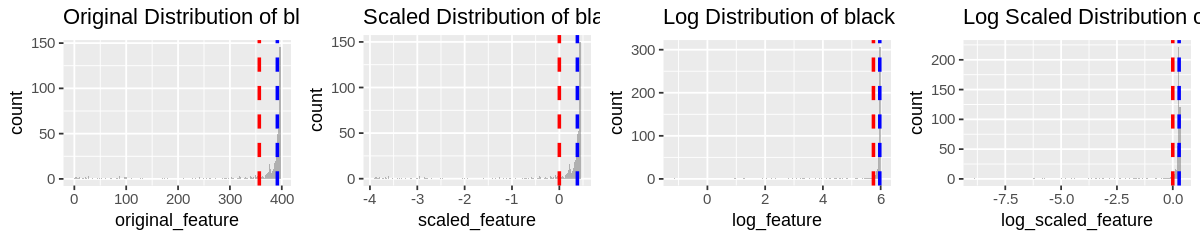

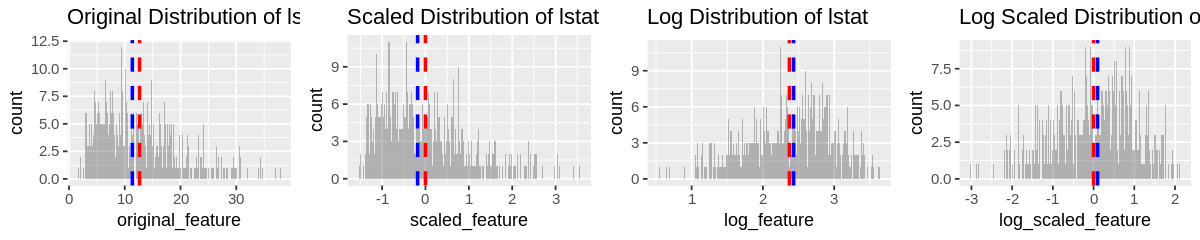

In [20]:
for (i in 1:length(Boston))
    original_v_scaled_v_log(colnames(Boston[i]))

### Transformation Process

We performed 2 set of transformations:

Order of these operations are important and each step addresses a different issue.

First we reduced the skewness of the data (moving the mean and the median closer to each other) by applying the log transformation. Due to the high number of zero values that appeared in two of the feature columns, we added some arbitary constant to these feature columns. This allowed us to keep all of the data without having to drop the zero value instances.

Next we applied the standard scaling, which makes the values of each feature in the data have zero-mean and unit-variance.